In [2]:
# !pip install matplotlib
# !pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clustering

Clustering is the grouping of objects in such a way that the objects in each category are more similar to other objects in other categories.<br>
<img src="https://drive.google.com/uc?id=1RDHbS2bWOKM4WAq7sGMhrVLLBxegNer0"></img>


## Sample Data

First we generate some sample data

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)

(100, 2)


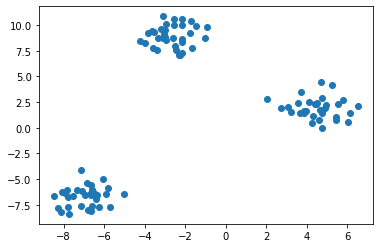

In [4]:
plt.scatter(X[:, 0], X[:, 1])

## K-means Algorithm

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [6]:

fitted = kmeans.fit(X)
labels = kmeans.labels_

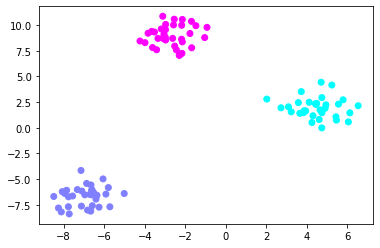

In [7]:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

### Number of Clusters

One of the weaknesses of the k-means algorithm is specifying the number of clusters. In this example, we can guess the number of clusters by looking at the figure. But in the real world this cannot be done. One way is to reduce the dimension using PCAand another method is to use the elbow method

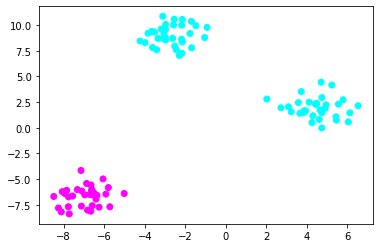

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)
fitted = kmeans.fit(X)
labels = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

### Elbow Method

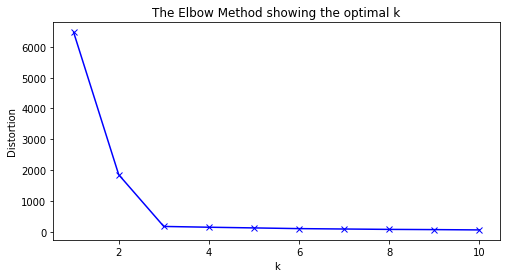

In [9]:
\distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## More Complex Clustering

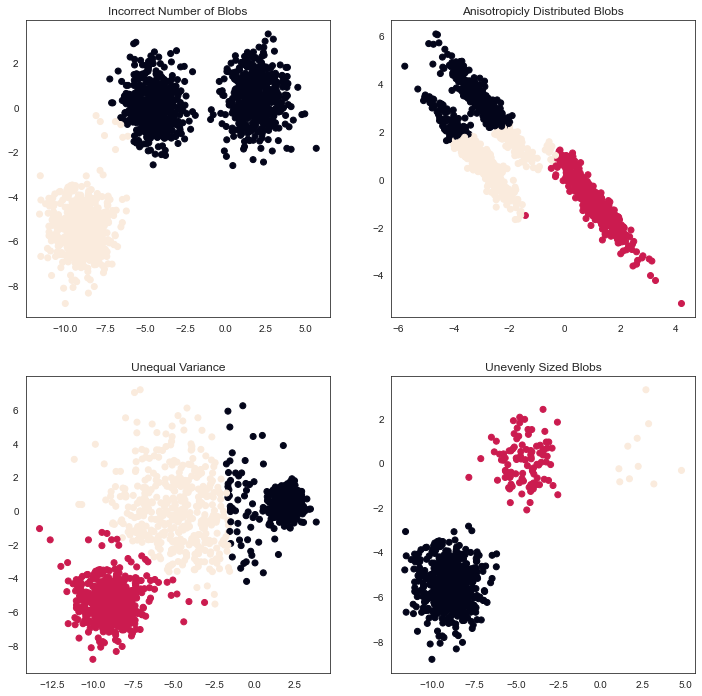

In [10]:
sns.set_style('white')

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits['data']
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
fitted = kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [13]:
centroids = centroids.reshape((len(centroids), 8, 8))
centroids.shape

(10, 8, 8)

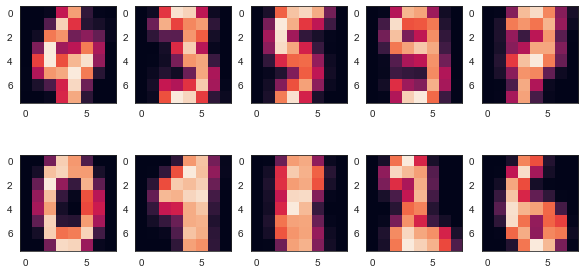

In [14]:
fig = plt.figure(figsize=(10, 5))
# setting values to rows and column variables
rows = 2
columns = 5
for i in range(len(centroids)):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(centroids[i])
    
plt.show()

In [127]:
from sklearn.manifold import Isomap
digits = load_digits()
data = digits['data']
target = digits['target']
embedding = Isomap(n_components=2)
data_transformed = embedding.fit_transform(data)
data_transformed.shape

C:\Users\mahva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\mahva\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [129]:
print(target)
print(labels)

[0 1 2 ... 8 9 8]
[ 0  0 -1 ...  1  1  1]


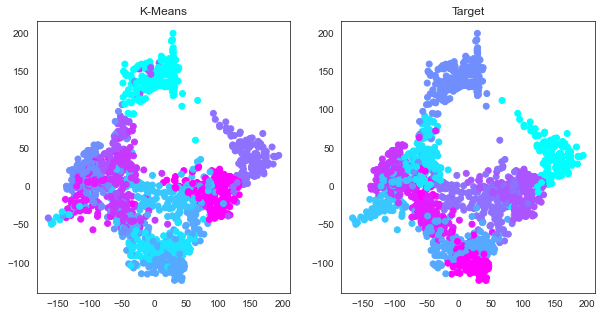

In [16]:
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
plt.title("K-Means")
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], cmap=plt.cm.cool, c=labels)
fig.add_subplot(1, 2, 2)
plt.title("Target")
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], cmap=plt.cm.cool, c=target)

### Dimension Reduction using Kmeans

In [131]:
from matplotlib.pyplot import imread

img = imread('../data/bird.jpg')


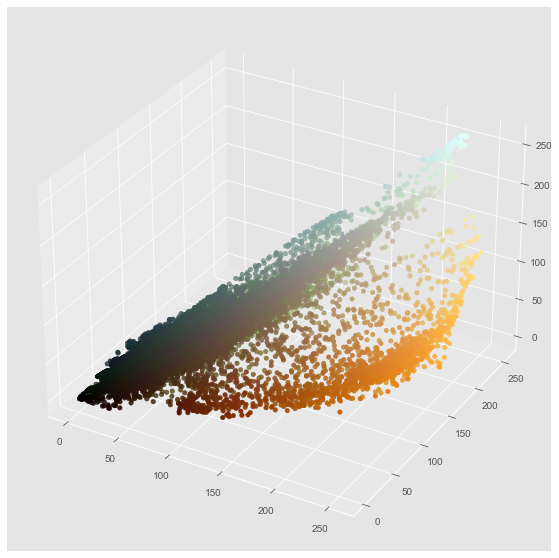

In [132]:

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

A = img.reshape((img.shape[0] *img.shape[1], 3))

ax.scatter3D(A[:, 0], A[:, 1], A[:, 2], color=A[:]/255.0)

In [20]:
img.shape

(133, 236, 3)

In [21]:
rows = img.shape[0]
cols = img.shape[1]

flatten_img = img.reshape(rows*cols, 3)
flatten_img.shape

(31388, 3)

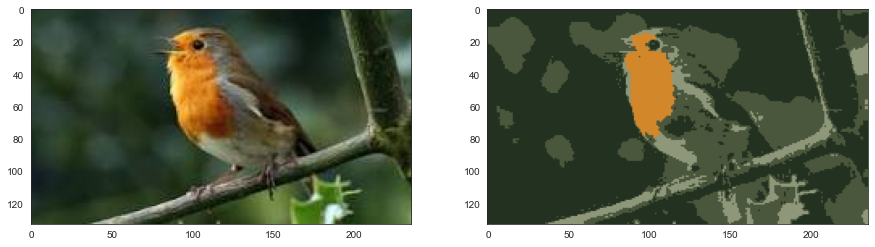

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(flatten_img)

compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

compressed_image = compressed_image.reshape(rows, cols, 3)


fig = plt.figure(figsize=(15, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.show()

# DBSCAN Algorithm

DBSCAN algorithm is one of the other algorithms used for data clustering, which can cluster data with different shapes and detect noises and anomalies in the data. <br>
DBSCAN has 2 parameters called eps and min points that must be set for the algorithm. <br>
To find the best epsilon suitable for the data set, in addition to testing different values, the KNN distance method (calculating the average distance between each point and its k nearest neighbors) is also used to automatically determine the optimal epsilon value.<br>
k here is equal to the minimum number of points in the cluster, which is the equivalent of MinPts. Unlike the epsilon parameter, there is no automatic method for determining MinPts. But according to some characteristics of the data set, there are some general rules that can help us in finding the appropriate range of MinPts values for that data set. These rules include:


- The larger the data set, the larger the value of MinPts should be<br>
- If the data set is noisier, choose a larger value of MinPts<br>
- Generally, MinPts should be greater than or equal to the dimensionality of the data set<br>
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).<br>
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998)<br>

According to these rules a MinPts of 4 is suitable for our dataset

In [48]:
!pip install --upgrade kneed

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import v_measure_score
from kneed import KneeLocator
import pandas as pd 


In [43]:
from matplotlib import pyplot as plt

def k_distance(n_neighbors, dataset):
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    return distances
    
    


Epsilon: 0.197


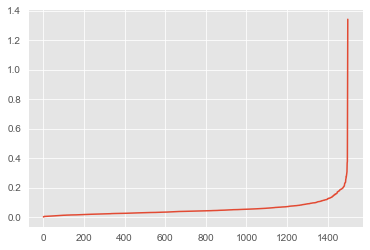

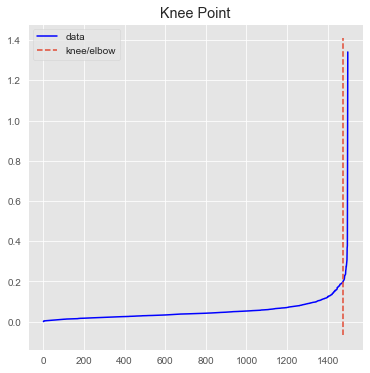

In [134]:
d = k_distance(4, X_aniso)
kneedle = KneeLocator(range(len(d)), d, S=1.0, curve='convex', direction='increasing')

kn = round(kneedle.knee, 3)

kneedle.plot_knee()
print(f"Epsilon: {round(d[kn], 3)}")


Epsilon: 0.649


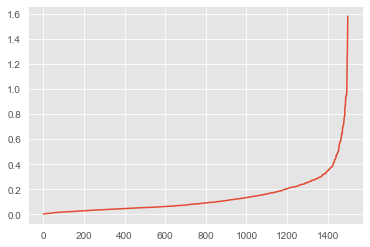

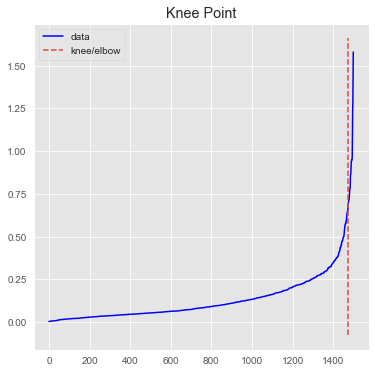

In [133]:
d = k_distance(4, X_varied)
kneedle = KneeLocator(range(len(d)), d, S=1.0, curve='convex', direction='increasing')

kn = round(kneedle.knee, 3)

kneedle.plot_knee()
print(f"Epsilon: {round(d[kn], 3)}")


We found the best MinPts based on the rules, but this value does not necessarily provide us with the best clustering.<br>
In this step, considering the obtained epsilon and testing different values for the MinPts parameter, we draw the best case for clustering using appropriate colors.

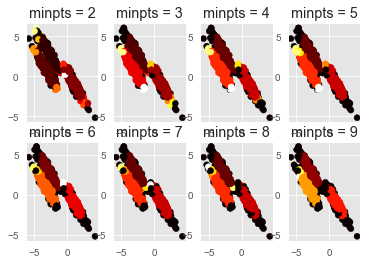

In [135]:
for i in range(2, 10):
    plt.subplot(2, 4, i-1)
    dbscan = DBSCAN(eps = 0.197, min_samples = i).fit(X_aniso) # fitting the model
    labels = dbscan.labels_ # getting the labels
    plt.scatter(X_aniso[:, 0], X_aniso[:,1], c = labels, cmap= "hot") # plotting the clusters
    plt.title("minpts = {}".format(i))

plt.show()

Best value is 9

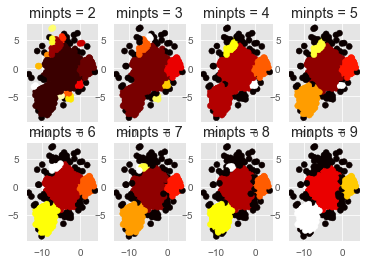

In [136]:
for i in range(2, 10):
    plt.subplot(2, 4, i-1)
    dbscan = DBSCAN(eps = 0.649, min_samples = i).fit(X_varied) # fitting the model
    labels = dbscan.labels_ # getting the labels
    plt.scatter(X_varied[:, 0], X_varied[:,1], c = labels, cmap= "hot") # plotting the clusters
    plt.title("minpts = {}".format(i))

plt.show()